In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)


data = pd.read_excel('nba_leader_data.xlsx')

In [3]:
data.sample(10)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
616,2012-13,Playoffs,202334,149,Ed Davis,1610612763,MEM,8,48,5,12,0.417,0,0,0.000,3,4,0.750,4,7,11,0,0,1,2,7,13,15,0.00,0.00
5403,2019-20,Regular%20Season,202951,458,Jeremy Pargo,1610612744,GSW,3,44,11,22,0.500,3,7,0.429,0,1,0.000,1,2,3,8,1,0,4,8,25,21,2.00,0.25
3320,2016-17,Playoffs,2733,82,Shaun Livingston,1610612744,GSW,14,220,34,59,0.576,0,0,0.000,5,7,0.714,10,19,29,20,5,2,10,24,73,92,2.00,0.50
2647,2015-16,Playoffs,202700,110,Donatas Motiejunas,1610612745,HOU,5,98,16,37,0.432,4,9,0.444,8,17,0.471,10,16,26,5,4,2,12,11,44,39,0.42,0.33
834,2013-14,Regular%20Season,200826,158,J.J. Barea,1610612750,MIN,79,1471,254,656,0.387,73,231,0.316,79,100,0.790,16,138,154,303,26,0,125,129,660,595,2.42,0.21
7228,2021-22,Playoffs,1627884,153,Derrick Jones Jr.,1610612741,CHI,5,59,7,17,0.412,3,11,0.273,2,3,0.667,3,4,7,2,1,0,3,8,19,15,0.67,0.33
5248,2019-20,Regular%20Season,1627756,303,Denzel Valentine,1610612741,CHI,36,488,97,237,0.409,46,137,0.336,6,8,0.750,9,65,74,43,26,6,26,51,246,227,1.65,1.00
5644,2019-20,Playoffs,1629743,169,Donta Hall,1610612751,BKN,3,20,3,5,0.600,0,0,0.000,1,4,0.250,3,2,5,0,0,2,1,1,7,8,0.00,0.00
573,2012-13,Playoffs,2550,105,Kirk Hinrich,1610612741,CHI,4,162,16,37,0.432,4,11,0.364,9,14,0.643,1,10,11,23,8,1,8,14,45,54,2.88,1.00
187,2012-13,Regular%20Season,202685,188,Jonas Valanciunas,1610612761,TOR,62,1482,204,366,0.557,0,0,0.000,146,185,0.789,121,251,372,45,17,78,94,188,554,771,0.48,0.18


In [4]:
data.drop(columns=['RANK','EFF'], inplace=True)

In [5]:
data['Season_start_year']=data['Year'].str[:4].astype(int)

In [6]:
data['TEAM'].replace(to_replace=['NOP','NOH'], value='NO', inplace = True)

In [7]:
data['Season_type'].replace('Regular%20Season','Regular Season', inplace = True)

In [8]:
rs_df = data[data['Season_type'] == 'Regular Season']
pl_df = data[data['Season_type'] == 'Playoffs']

In [9]:
data.columns

Index(['Year', 'Season_type', 'PLAYER_ID', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'AST_TOV', 'STL_TOV', 'Season_start_year'],
      dtype='object')

In [10]:
total_cols = ['MIN','FGM','FGA','FG3M','FG3A','FTM','FTA','OREB',
              'DREB','REB','AST','STL','BLK','TOV','PF','PTS']

In [11]:
data.corr()

/var/folders/0b/4xsz0g7d6hsc9d18v9q0x3rh0000gn/T/ipykernel_19450/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PLAYER_ID,TEAM_ID,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV,Season_start_year
PLAYER_ID,1.000000,0.022977,-0.110871,-0.147330,-0.123182,-0.127147,-0.032208,-0.049554,-0.043845,0.024138,-0.132087,-0.135092,-0.092864,-0.106075,-0.132507,-0.129342,-0.115170,-0.131168,-0.094553,-0.141845,-0.131209,-0.122213,-0.007789,0.019181,0.590082
TEAM_ID,0.022977,1.000000,0.032714,0.021881,0.014579,0.019118,-0.024033,-0.010916,-0.007505,-0.012644,0.017099,0.018780,0.000494,0.022567,0.013688,0.016661,0.002746,0.017960,0.018783,0.010808,0.024101,0.012804,-0.000385,0.021074,-0.002347
GP,-0.110871,0.032714,1.000000,0.905689,0.788445,0.795111,0.220308,0.623257,0.645441,0.203063,0.636555,0.656909,0.347097,0.634207,0.777293,0.762127,0.638666,0.789698,0.581335,0.753415,0.900103,0.776017,0.142802,0.073368,-0.091168
MIN,-0.147330,0.021881,0.905689,1.000000,0.934394,0.940094,0.201712,0.734773,0.754681,0.226314,0.799660,0.812027,0.338683,0.652698,0.862466,0.831142,0.780170,0.891374,0.610761,0.887299,0.918044,0.928293,0.159592,0.031532,-0.075484
FGM,-0.123182,0.014579,0.788445,0.934394,1.000000,0.989268,0.212882,0.721031,0.737921,0.211664,0.895763,0.899181,0.313596,0.626327,0.849858,0.814209,0.792481,0.828891,0.588753,0.919148,0.831613,0.993871,0.118931,-0.039272,-0.028912
FGA,-0.127147,0.019118,0.795111,0.940094,0.989268,1.000000,0.163347,0.776475,0.798398,0.239063,0.887771,0.882643,0.330840,0.557728,0.812581,0.766806,0.812842,0.843004,0.529436,0.923872,0.821861,0.990890,0.140099,-0.031657,-0.041335
FG_PCT,-0.032208,-0.024033,0.220308,0.201712,0.212882,0.163347,1.000000,0.029518,0.018970,0.164501,0.170973,0.195945,0.200012,0.315523,0.263483,0.286920,0.103739,0.153881,0.281480,0.169393,0.248106,0.193182,0.026834,0.069498,0.032637
FG3M,-0.049554,-0.010916,0.623257,0.734773,0.721031,0.776475,0.029518,1.000000,0.992118,0.380633,0.597984,0.553945,0.328672,0.143688,0.485708,0.404432,0.643731,0.662230,0.194724,0.651837,0.578177,0.762939,0.193526,0.040476,0.084559
FG3A,-0.043845,-0.007505,0.645441,0.754681,0.737921,0.798398,0.018970,0.992118,1.000000,0.367296,0.622181,0.580731,0.334766,0.158567,0.505221,0.423268,0.668935,0.687096,0.208374,0.680652,0.600188,0.779206,0.198328,0.041021,0.086685
FG3_PCT,0.024138,-0.012644,0.203063,0.226314,0.211664,0.239063,0.164501,0.380633,0.367296,1.000000,0.154014,0.124740,0.291124,-0.079684,0.094299,0.047942,0.221181,0.214266,-0.029744,0.182502,0.148879,0.229793,0.255817,0.123225,0.115192


In [12]:
data_per_min = data.groupby(['PLAYER','PLAYER_ID','Year'])[total_cols].sum().reset_index()
for col in data_per_min.columns[4:]:
    data_per_min[col] = data_per_min[col]/data_per_min['MIN']
    
data_per_min['FG%'] = data_per_min['FGM']/data_per_min['FGA']
data_per_min['3PT%'] = data_per_min['FG3M']/data_per_min['FG3A']
data_per_min['FT%'] = data_per_min['FTM']/data_per_min['FTA']
data_per_min['FG3A%'] = data_per_min['FG3A']/data_per_min['FGA'] #percentage attempts 3s
data_per_min['PTS/FGA'] = data_per_min['PTS']/data_per_min['FGA'] #average pts per attempt
data_per_min['FG3M/FGM'] = data_per_min['FG3M']/data_per_min['FGM'] #percentage makes behind arc
data_per_min['FTA/FGA'] = data_per_min['FTA']/data_per_min['FGA']
data_per_min['TRU%'] = 0.5*data_per_min['PTS']/(data_per_min['FGA']+0.475*data_per_min['FTA'])
data_per_min['AST_TOV'] = data_per_min['AST']/data_per_min['TOV'] #assist to turnover ratio

data_per_min = data_per_min[data_per_min['MIN']>=50]
data_per_min.drop(columns='PLAYER_ID', inplace = True)

fig = px.imshow(data_per_min.corr())
fig.show()

/var/folders/0b/4xsz0g7d6hsc9d18v9q0x3rh0000gn/T/ipykernel_19450/3518044816.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(data_per_min.corr())


/var/folders/0b/4xsz0g7d6hsc9d18v9q0x3rh0000gn/T/ipykernel_19450/1197896999.py:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



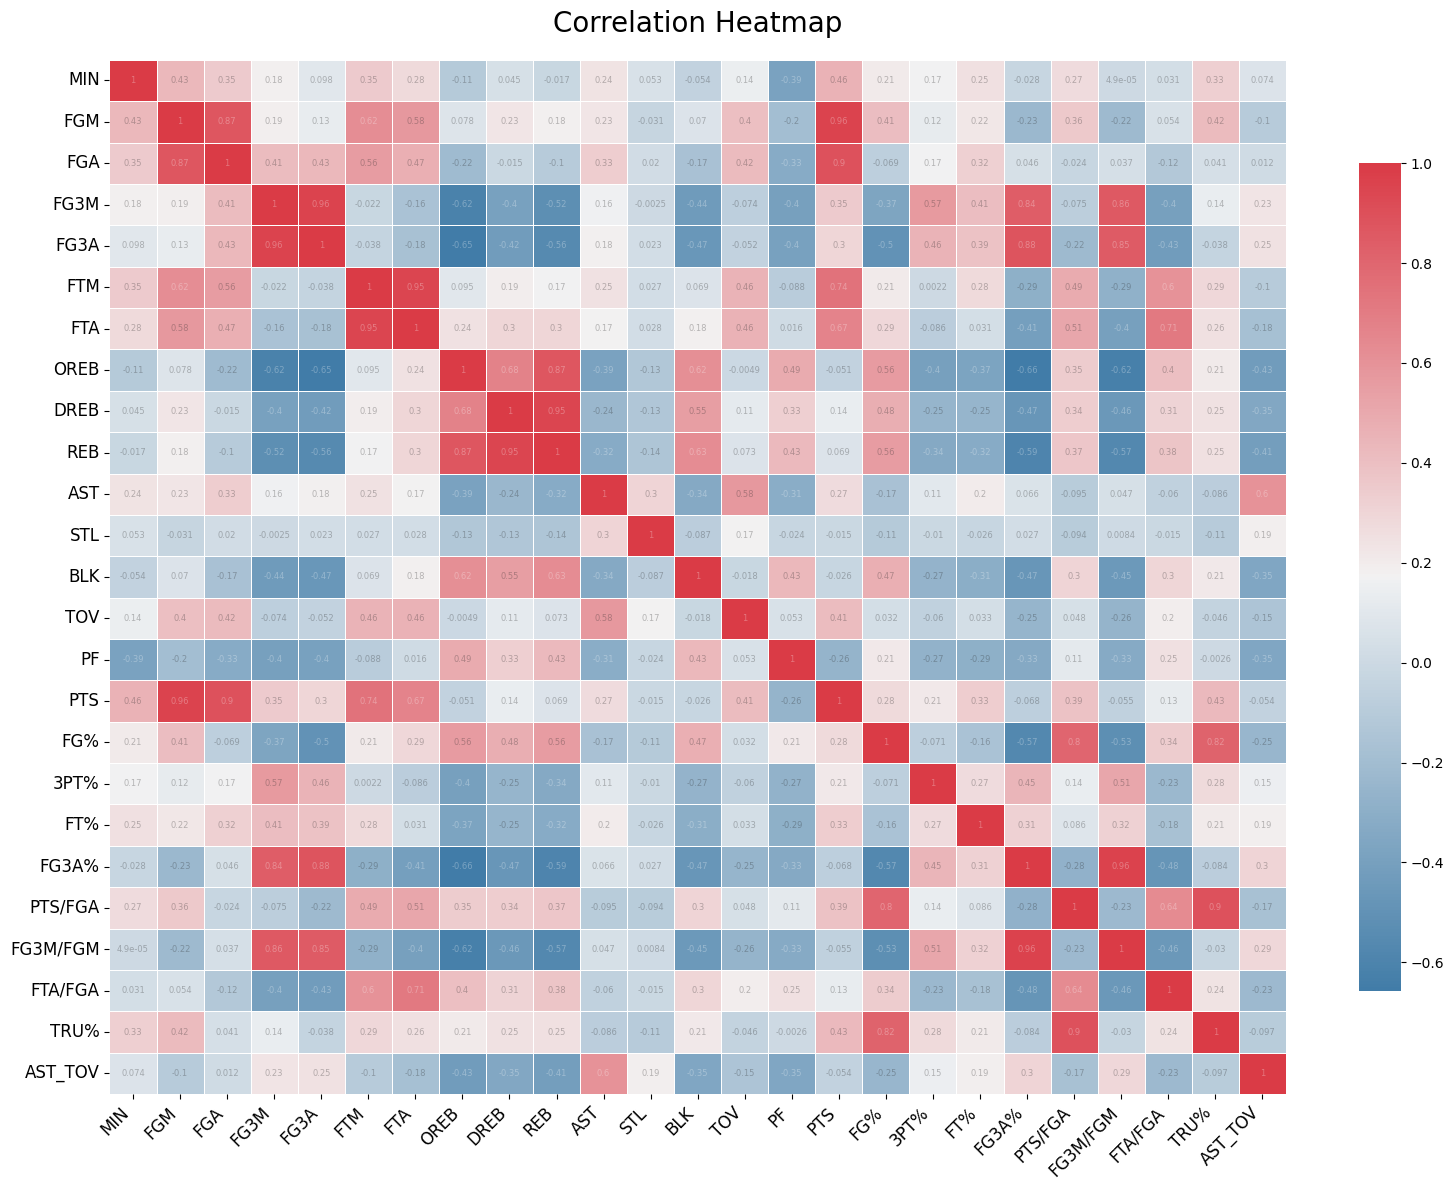

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Increase the figure size for better readability
plt.figure(figsize=(16, 12))

# Use a more visually appealing color map
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Generate the heatmap with small and almost invisible correlation coefficients
ax = sns.heatmap(
    data_per_min.corr(),
    cmap=cmap,
    linewidths=0.5,
    annot=True,
    annot_kws={"fontsize": 6, "alpha": 0.3},
    cbar_kws={"shrink": 0.8},
)

# Set the title and labels
ax.set_title("Correlation Heatmap", fontsize=20, pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()

In [14]:
change_df = data.groupby('Season_start_year')[total_cols].sum().reset_index()
change_df['POSS_est'] = change_df['FGA']-change_df['OREB']+change_df['TOV']+0.44*change_df['FTA']
change_df[list(change_df.columns[0:2])+['POSS_est']+list(change_df.columns[2:-1])]
change_df['FG%'] = change_df['FGM']/change_df['FGA']
change_df['3PT%'] = change_df['FG3M']/change_df['FG3A']
change_df['FT%'] = change_df['FTM']/change_df['FTA']
change_df['FG3A%'] = change_df['FG3A']/change_df['FGA'] #percentage attempts 3s
change_df['PTS/FGA'] = change_df['PTS']/change_df['FGA'] #average pts per attempt
change_df['FG3M/FGM'] = change_df['FG3M']/change_df['FGM'] #percentage makes behind arc
change_df['FTA/FGA'] = change_df['FTA']/change_df['FGA']
change_df['TRU%'] = 0.5*change_df['PTS']/(change_df['FGA']+0.475*change_df['FTA'])
change_df['AST_TOV'] = change_df['AST']/change_df['TOV']
cols = change_df.columns.tolist()
cols.remove('POSS_est')
cols.insert(2, 'POSS_est')
change_df = change_df[cols]
change_df

,Season_start_year,MIN,POSS_est,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2012,635884,248201.92,97235,215105,18808,52569,44125,58618,29237,81362,110599,57694,20376,13444,36542,52548,257403,0.452035,0.357777,0.752755,0.244388,1.196639,0.193428,0.272509,0.529748,1.578841
1,2013,638373,254032.80,99251,218411,20480,56952,47219,62420,28669,83812,112481,57657,20156,12369,36826,54839,266201,0.454423,0.359601,0.756472,0.260756,1.218808,0.206346,0.285791,0.536565,1.565660
2,2014,634546,253004.12,98251,219265,20724,59276,45098,60248,28566,85231,113797,57727,20261,12665,35796,53272,262324,0.448092,0.349619,0.748539,0.270340,1.196379,0.210929,0.274773,0.529129,1.612666
3,2015,636391,258064.80,100351,222344,22524,63673,46516,61520,27426,87611,115037,58251,20562,13046,36078,53478,269742,0.451332,0.353745,0.756112,0.286372,1.213174,0.224452,0.276688,0.536126,1.614585
4,2016,632482,258443.80,102147,223333,25408,71018,46806,60620,26470,87173,113643,59162,20143,12409,34908,52232,276508,0.457375,0.357768,0.772121,0.317992,1.238097,0.248740,0.271433,0.548350,1.694798
5,2017,633425,260904.52,103729,225523,27530,76245,43721,57008,25397,88678,114075,60739,20181,12636,35695,52238,278709,0.459949,0.361073,0.766927,0.338081,1.235834,0.265403,0.252781,0.551677,1.701611
6,2018,634231,268739.84,107374,233717,29817,84143,46671,60811,27128,91360,118488,64257,19940,12984,35394,55063,291236,0.459419,0.354361,0.767476,0.360021,1.246105,0.277693,0.260191,0.554519,1.815477
7,2019,552262,234384.64,92997,202223,28032,78279,40949,52906,22802,79318,102120,55445,17368,11085,31685,47615,254975,0.459874,0.358104,0.773995,0.387092,1.260861,0.301429,0.261622,0.560746,1.749882
8,2020,562518,235759.48,95849,205754,29549,80653,39624,50917,22918,80151,103069,57311,17491,11272,30520,45152,260871,0.465843,0.366372,0.778208,0.391988,1.267878,0.308287,0.247465,0.567260,1.877818
9,2021,635572,264004.96,106569,231293,32733,92552,44740,57709,27052,89602,116654,64618,20006,12387,34372,52038,290611,0.460753,0.353671,0.775269,0.400150,1.256463,0.307153,0.249506,0.561665,1.879960


In [15]:
fig = px.histogram(x=rs_df['MIN'])
fig.show()
fig2 = px.histogram(x=rs_df['FGA'])
fig2.show()

In [16]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=rs_df['MIN']/rs_df['GP'], histnorm='percent', name='RS',
                          xbins={'start':0,'end':46,'size':1}))
fig.add_trace(go.Histogram(x=pl_df['MIN']/pl_df['GP'], histnorm='percent', name='Playoffs',
                          xbins={'start':0,'end':46,'size':1}))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity = 0.5)
fig.show()

In [17]:
change_per100_df = change_df.copy()
change_per100_df
for col in change_per100_df.columns[3:18]:
    change_per100_df[col] = (change_per100_df[col]/change_per100_df['POSS_est'])*100

change_per100_df.drop(columns = ['MIN','POSS_est'], inplace = True)
change_per100_df

fig = go.Figure()
for col in change_per100_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per100_df['Season_start_year'],
                             y=change_per100_df[col], name=col))

fig.show()

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
df = data.copy()
features = ['PLAYER','GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'AST_TOV', 'STL_TOV']
df = df[features]
df = df.dropna()

interesting_features = df.columns.tolist()
interesting_features.remove('PLAYER')

pivot_table = df.pivot_table(index='PLAYER', values=interesting_features, aggfunc='mean')
similarity_matrix = cosine_similarity(pivot_table)
similarity_df = pd.DataFrame(similarity_matrix, index=pivot_table.index, columns=pivot_table.index)

players = ['LeBron James', 'Stephen Curry', 'Nikola Jokic']
for player in players:
    print(f'Top 10 players similar to {player}:')
    print(similarity_df[player].sort_values(ascending=False)[1:11])
    print('\n')

Top 10 players similar to LeBron James:
PLAYER
Kevin Durant               0.997617
Russell Westbrook          0.997591
Ja Morant                  0.997226
Luka Doncic                0.995926
Kobe Bryant                0.994747
Jayson Tatum               0.994713
Kawhi Leonard              0.994672
Shai Gilgeous-Alexander    0.993848
Devin Booker               0.993827
Paul George                0.993708
Name: LeBron James, dtype: float64


Top 10 players similar to Stephen Curry:
PLAYER
Donovan Mitchell    0.997408
Damian Lillard      0.996994
Anthony Edwards     0.995247
Kyrie Irving        0.995099
Devin Booker        0.994148
D'Angelo Russell    0.993411
Zach LaVine         0.993352
Jordan Poole        0.993239
Paul George         0.992717
Bradley Beal        0.992699
Name: Stephen Curry, dtype: float64


Top 10 players similar to Nikola Jokic:
PLAYER
Karl-Anthony Towns       0.995870
Julius Randle            0.995578
Giannis Antetokounmpo    0.994755
DeMarcus Cousins         0.9935